# Extract location information
In this part, I will extract street address and city information. My purpose is to extract as much information as possible, so that I can group by these rows by market name and make it easier to detect duplicates.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load in data from part 01

In [2]:
data = pd.read_csv('01out')
data.head()

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col2,col3,col8,col9
0,Waialua Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,X,8:30 AM to 12:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,info@sugarmillhawaii.com,Waialua Sugar Mill,Edith Ramiscal,NaN,NaN,NaN
1,Kekaha Neighborhood Center (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,X,9:00 AM,NaN,NaN,NaN,NaN,Cora Asuncion,(808) 742-1834,NaN,"Elepaio Road, Kekaha",NaN,NaN,NaN,NaN
2,Hali'imaile Farmers' Market,NaN,NaN,NaN,NaN,NaN,X,NaN,1:00 PM to 6:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hali'imaile Town Center (in a former Maui Pineapple Co. parking lot next to Hali'imaile General Store),NaN,NaN,NaN,NaN
3,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,X,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com,International Market Place-Waikiki (near the Food Court),NaN,NaN,NaN,NaN
4,Country Market & Craft Fair at Waimanalo Homestead Community Center,X,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 4:00 PM,"1330 Kalanianaole Hwy., HI",Waimanalo Homestead Community Center,Oahu,NaN,Paul Richard,"(808) 259-8611, (808) 284-2575",NaN,NaN,NaN,NaN,NaN,NaN


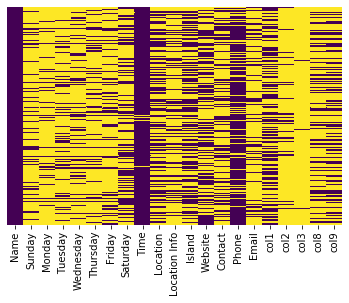

In [3]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

In [4]:
#Check unique values in col3
data['col3'].unique()

array([nan, 'First Wednesdays', '1st & 3rd Wednesdays',
       'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM'],
      dtype=object)

Schedule information will contain weekdays, so I will check which columns have weekdays.

In [5]:
#Print column names that might have schedule information
print('Columns which might have weekday information:')
for col in data[['Location','Location Info','col1','col2','col3','col8','col9']]:
    if (data[col].str.contains('(?:\d{1,2}(?:st|nd|rd|th))?'     \
                               '(?:Sun|Mon|Tues|Wed|Thu|Fri|Sat)')).any() == True:
        print(col)

Columns which might have weekday information:
Location Info
col1
col2
col3


## Schedule and Time
Let's check each column to make sure that we have right information.

In [6]:
data[data['Location Info'].str.contains('(?:\d{1,2}(?:st|nd|rd|th))?'     \
                                        '(?:Sun|Mon|Tues|Wed|Thu|Fri|Sat)',na=False)][['Location Info','col3']]

,Location Info,col3
6,First Wednesdays,NaN
35,2nd & 4th Tuesdays,NaN
40,2nd and 4th Tuesday of each month,NaN
55,1st Wed.,First Wednesdays
102,"1st & 3rd Wednesdays, across from Thomas Square",NaN
105,2nd & 4th Tuesdays,NaN
173,Monsarrat and Paki Street,NaN


In [7]:
#Replace col3 with schedule information
data.loc[6][['Location Info','col3']] = [np.nan,'1st Wednesdays']
data.loc[35][['Location Info','col3']] = [np.nan,'2nd and 4th Tuesdays']
data.loc[40][['Location Info','col3']] = [np.nan,'2nd and 4th Tuesdays']
data.loc[55][['Location Info','col3']] = [np.nan,'1st Wednesdays']
data.loc[102][['Location Info','col3']] = [np.nan,'1st and 3rd Wednesdays']
data.loc[105][['Location Info','col3']] = [np.nan,'2nd and 4th Tuesdays']

In [8]:
data[data['col1'].str.contains('(?:\d{1,2}(?:st|nd|rd|th))?'     \
                               '(?:Sun|Mon|Tues|Wed|Thu|Fri|Sat)',na=False)][['col1','col3']]

,col1,col3
20,2nd Saturday of the month from 9:00 AM to 1:00 PM,NaN
49,"Monsarrat and Paki Street, Honolulu",NaN
215,"Sunset Beach Elementary School, Haleiwa",NaN


Only replace col3 with schedule information

In [9]:
data.loc[20][['col1','col3']] = [np.nan,'2nd Saturdays']

In [10]:
data[data['col2'].str.contains('(?:\d{1,2}(?:st|nd|rd|th))?'     \
                               '(?:Sun|Mon|Tues|Wed|Thu|Fri|Sat)',na=False)][['col2','col3']]

,col2,col3
110,Every Wednesday,NaN
117,Every Sunday,NaN
137,2nd and 4th Tuesday of each month,NaN


In [11]:
data.loc[110][['col2','col3']] = [np.nan,'Every Wednesday']
data.loc[117][['col2','col3']] = [np.nan,'Every Sunday']
data.loc[137][['col2','col3']] = [np.nan,'2nd and 4th Tuesdays']

In [12]:
data[data['col3'].str.contains('(?:\d{1,2}(?:st|nd|rd|th))?'     \
                               '(?:Sun|Mon|Tues|Wed|Thu|Fri|Sat)',na=False)]['col3']

6      1st Wednesdays                                        
20     2nd Saturdays                                         
35     2nd and 4th Tuesdays                                  
40     2nd and 4th Tuesdays                                  
55     1st Wednesdays                                        
102    1st and 3rd Wednesdays                                
105    2nd and 4th Tuesdays                                  
110    Every Wednesday                                       
117    Every Sunday                                          
125    1st & 3rd Wednesdays                                  
137    2nd and 4th Tuesdays                                  
206    Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM
Name: col3, dtype: object

In [13]:
data.loc[125]['col3'] = '1st and 3rd Wednesdays'

Row 206 has different time information for different weekdays, so I would like to see the whole row.

In [14]:
data.loc[206]

Name             Kaka'ako Makai Community Cultural Marketplace         
Sunday           NaN                                                   
Monday           NaN                                                   
Tuesday          NaN                                                   
Wednesday        NaN                                                   
Thursday         NaN                                                   
Friday           X                                                     
Saturday         X                                                     
Time             9:00 AM to 2:00 PM, 4:30 PM to 8:00 PM                
Location         NaN                                                   
Location Info    NaN                                                   
Island           NaN                                                   
Website          www.KakaakoMakaiMarket.com                            
Contact          NaN                                            

So we have check marks for each time and weekdays. Since I don't want to change the time format, I will replace check marks with time.

In [15]:
for col in data[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']]:
    data[col] = np.where(data[col].notna(), data['Time'], data[col])

In [16]:
#Check rows that have more than one time data:
data[data['Time'].str.contains(',',na=False)][['Sunday','Monday','Tuesday','Wednesday',
                                               'Thursday','Friday','Saturday','Time']]

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time
206,NaN,NaN,NaN,NaN,NaN,"9:00 AM to 2:00 PM, 4:30 PM to 8:00 PM","9:00 AM to 2:00 PM, 4:30 PM to 8:00 PM","9:00 AM to 2:00 PM, 4:30 PM to 8:00 PM"
211,NaN,NaN,"4:00 PM, 10:00 AM","4:00 PM, 10:00 AM","4:00 PM, 10:00 AM","4:00 PM, 10:00 AM","4:00 PM, 10:00 AM","4:00 PM, 10:00 AM"


In [17]:
#Correct time and weekdays
data.loc[206][['Friday','Saturday']] = ['4:30 PM to 8:00 PM','9:00 AM to 2:00 PM']
data.loc[211][['Tuesday','Wednesday','Thursday','Friday','Saturday','Time']] = '10:00 AM to 4:00 PM'

In [18]:
#Check if we miss any time data
data[data['Time'].isna()]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col2,col3,col8,col9
111,Hana Fresh Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4590 Hāna Highway,between mile markers 34 and 35.,Maui,NaN,NaN,(808) 248-7515,NaN,NaN,NaN,NaN,"Hana, HI 96713","(20.64924257700045, -156.06698936499973)"
113,Koloa Ball Park (Knudsen) (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Branch Harmony,(808) 322-0718,NaN,"Maluhia Road, Koloa",Noon,NaN,NaN,NaN
116,Ono Organic Farms Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Old gas station, Hasegawa General Store - Hana Hwy.",All day,NaN,NaN,NaN
163,Koloa Ball Park (Knudsen) (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maluhia Road,NaN,Kauai,NaN,Branch Harmony,(808) 322-0718,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Fill in col3 with data in col2 for row 113 and 116
data.loc[113][['col3','col2']] = ['Noon', np.nan]
data.loc[116][['col3','col2']] = ['All day', np.nan]

Now we can change data in col3 row 206

In [20]:
data.loc[206]['col3'] = 'Every Friday and Saturday'

## Location
In this part, I will go over columns Location, Location Info, col1, and col2 to see if we can extract address information from these columns.<br>
First, check for unique values in Location and Location Info.

In [21]:
data['Location'].unique()

array([nan, '1330 Kalanianaole Hwy., HI', '1301 Punchbowl Street',
       '2330 Kalakaua Avenue', '64-759 Kahilu Road, Waimea',
       '2237 South King Street', 'Lihue', '45-660 Keaahala Road',
       '91-740 Papipi Road', '74-5465 Kamakaeha Avenue',
       '715 Hoomoana St', '95-1200 Meheula Parkway',
       '45-259 Waikalua Road', '1601 N. School Street', '200 Olinda Rd.',
       '841 Bishop Street', 'Elepaio Road, Kekaha', '381 Baldwin Ave',
       'Captain Cook', '21 South Kainalu Drive', 'Kapolei, HI',
       '1515 Wilder Avenue', '99-795 Iwaiwa Street, HI',
       '1450 Ala Moana Blvd.', '17-995 Volcano Rd',
       '800 North King Street', 'HI', '777 Ward Ave',
       '1527 Keeaumoku Street', 'Haleiwa, HI', '94-870 Lumiaina Street',
       '55 Kiopaa St', '3636 Lower Honoapi‘ilani Road',
       '70 East Kaahumanu Ave', '95 Lipoa Street', '5337 Likini Street',
       '2721 Kaaipu Avenue', '1330 Kalanianaole Hwy.', 'Kailua, HI',
       '525 Coral Street', '91-955 North Road', '64-6

In [22]:
data['Location Info'].unique()

array([nan, 'Waimanalo Homestead Community Center', 'Next to Food Court',
       'In Front of Ace Hardware, Ka’u', 'Behind Paniolo Country Inn',
       'corner of Hoomoana & Komo Mai Dr',
       'Mililani High School Parking Lot', 'Kapalama Elementary School',
       "Po'okela Church on Olinda Road", 'Historical Paia train depot',
       'Parking on Wilder after 5:30 p.m',
       'Ala Moana Center, upper deck by Sears, corner of Piikoi & Ala Moana Blvd.',
       'Hilo Coffee Mill Farm, Between Mile Markers 12 & 13',
       'Parking lot across from Ward 16 Theatres, Corner of Auahi & Kamakee St.',
       'Campus front parking lot across from Grove Farm',
       'Ward Ave. & King Street',
       "in the parking lot next to Long's\xa0 Drugs at Kulamalu",
       'Location at Hawaiian Motors parking lot (across from Honokowai Park)',
       'Kailua Road - Kailua Parking Garage (behind Longs)',
       'Across from 7-11', 'Kam Hwy. and Joseph P. Leong Bypass',
       'Poipu Road and Cane Haul

The address should have street number, street name, and city. We don't need state since all of them are in Hawaii. Before extracting address and city information, I want to check if there's data in col1 or col2 when Location or Location Info is not missing.

In [23]:
[data[data[x].notna()][y].notna().any() for x in data[['Location']]
                                        for y in data[['col1','col2']]]

[True, True]

In more details

In [24]:
data[data['Location'].notna() & data['col1'].notna()][['Location','Location Info','col1']]

,Location,Location Info,col1
44,"Kapolei, HI",NaN,Kapolei High School
83,1330 Kalanianaole Hwy.,NaN,Waimanalo Homestead Community Center


For these two rows, we can fill in Location Info with values in col1.

In [25]:
data.loc[44][['Location Info','col1']] = ['Kapolei High School',np.nan]
data.loc[83][['Location Info','col1']] = ['Waimanalo Homestead Community Center',np.nan]

In [26]:
data[data['Location'].notna() & data['col2'].notna()][['Location','Location Info','col2']]

,Location,Location Info,col2
23,74-5465 Kamakaeha Avenue,NaN,"Makapua Center - In front of K-Mart, Kailua-Kona"


Same as col1, we can fill in Location Info with value in col2.

In [27]:
data.loc[23][['Location Info','col2']] = ['Makapua Center - In front of K-Mart, Kailua-Kona',np.nan]

Moving to Location Info

In [28]:
[data[data[x].notna()][y].notna().any() for x in data[['Location Info']]
                                        for y in data[['col1','col2']]]

[True, False]

In [29]:
data[data['Location Info'].notna() & data['col1'].notna()][['Location','Location Info','col1']]

,Location,Location Info,col1
125,NaN,1st & 3rd,"1100 Ward Ave., Honolulu (across from Thomas Square)"


col1 has address information, so I will move it to Location. Also, we can replace value in Location Info with Nan for this row.

In [30]:
data.loc[125]['Location Info'] = np.nan
data.loc[125][['Location','col1']] = ['1100 Ward Ave., Honolulu (across from Thomas Square)',np.nan]

Now we have separate location information in two pairs: Location - Location Info, or col1 - col2.<br>
Next, check which columns have street address information.

In [31]:
for col in data[['Location','Location Info','col1','col2']]:
    print(col + ' has street number information: ' +
         str(data[col].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False).any()))

Location has street number information: True
Location Info has street number information: False
col1 has street number information: True
col2 has street number information: True


In [32]:
#Print out unique values from these columns:
for col in data[['Location','col1','col2']]:
    print(data[data[col].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)][col].unique())

['1330 Kalanianaole Hwy., HI' '1301 Punchbowl Street'
 '2330 Kalakaua Avenue' '64-759 Kahilu Road, Waimea'
 '2237 South King Street' '45-660 Keaahala Road' '91-740 Papipi Road'
 '74-5465 Kamakaeha Avenue' '715 Hoomoana St' '95-1200 Meheula Parkway'
 '45-259 Waikalua Road' '1601 N. School Street' '200 Olinda Rd.'
 '841 Bishop Street' '381 Baldwin Ave' '21 South Kainalu Drive'
 '1515 Wilder Avenue' '99-795 Iwaiwa Street, HI' '1450 Ala Moana Blvd.'
 '17-995 Volcano Rd' '800 North King Street' '777 Ward Ave'
 '1527 Keeaumoku Street' '94-870 Lumiaina Street' '55 Kiopaa St'
 '3636 Lower Honoapi‘ilani Road' '70 East Kaahumanu Ave' '95 Lipoa Street'
 '5337 Likini Street' '2721 Kaaipu Avenue' '1330 Kalanianaole Hwy.'
 '525 Coral Street' '91-955 North Road' '64-604 Mana Road'
 '47-528A Kamehameha Hwy., HI' '1990 Kinoole Street, Hilo'
 '275 W. Ka’ahumanu Ave' '1100 Ward Ave' '85-037 Pokai Bay Road'
 '900 Haliimaile Rd' '4590 Hāna Highway' '1911 Kam IV Road'
 '131 Kaiulani Ave.' '91-1049 Kamaaha L

Before extracting address information from these columns, we should check if there're rows that have address information in both col1 and col2.

In [33]:
(data['Location'].isna() &
 data['col1'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False) &
 data['col2'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)).any()

False

In [34]:
#Fill in missing Location with col1 or col2 values that have street address information
for col in data[['col1','col2']]:
    data['Location'] = np.where(data['Location'].isna() &
                                data[col].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False),
                                data[col], data['Location'])

Now we can extract address information into two new columns: address and city.

In [35]:
data_location = data['Location'].str.extractall("^(\d+(?:\-?\d+)?(?:[A-Za-z]+)?) ?([A-Za-z'.-/]+(?:(?: [A-Za-z'.-/]+)+)?)"
                                                ",? ?((?!HI)[A-Za-z'.-/]+(?:(?!HI) [A-Za-z'.-/]+)?)?")
data_location = data_location.droplevel(level=1)
data_location['Address'] = data_location[0] + ' ' + data_location[1]
data_location['City'] = data_location[2]
data_location.drop([0,1,2], axis=1, inplace=True)
data = data.join(data_location)

Other than address information, what location information does Location columns has?

In [36]:
data[data['Location'].notna() &
    ~data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)][['Location','Location Info']]

,Location,Location Info
15,Lihue,NaN
36,"Elepaio Road, Kekaha",NaN
38,Captain Cook,NaN
44,"Kapolei, HI",Kapolei High School
58,HI,"Parking lot across from Ward 16 Theatres, Corner of Auahi & Kamakee St."
67,"Haleiwa, HI",NaN
84,"Kailua, HI",Kailua Road - Kailua Parking Garage (behind Longs)
96,HI,Kam Hwy. and Joseph P. Leong Bypass
100,"Honolulu, HI",Kalihi Street
112,"Kahau Road, Kapaa",NaN


We have street name and city in these rows. We can extract city information from these rows.

In [37]:
data['City'] = np.where(data['Location'].notna() &
                        ~data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?', na=False) &
                        ~data['Location'].str.contains('Road', regex=False, na=False),
                        data['Location'].str.findall('^[A-Z][a-z]+(?: [A-Z][a-z]+)?').str[0],
                        data['City'])

Remove data in Location column that have City information only.

In [38]:
data['Location'] = np.where((data['Location'].notna() &
                            ~data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?', na=False) &
                            (data['Location'] == data['City'])) |
                            (data['Location'].notna() &
                            ~data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?', na=False) &
                            data['Location'].str.contains('HI', regex=False, na=False)),
                            np.nan, data['Location'])

Now check these rows again

In [39]:
data[data['Location'].notna() &
    ~data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)][['Location','Location Info']]

,Location,Location Info
36,"Elepaio Road, Kekaha",NaN
112,"Kahau Road, Kapaa",NaN
120,Hoolako Road,NaN
163,Maluhia Road,NaN
190,Papalina Road,"Papalina Road off Kaumualii, Kalaheo"


Update Location Info, City column and replace data in Location with Nans.

In [40]:
data.loc[36][['Location','Location Info','City']] = [np.nan,'Elepaio Road','Kekaha']
data.loc[112][['Location','Location Info','City']] = [np.nan,'Kahau Road','Kapaa']
data.loc[120][['Location','Location Info']] = [np.nan,'Hoolako Road']
data.loc[163][['Location','Location Info']] = [np.nan,'Maluhia Road']
data.loc[190]['Location'] = np.nan

Check if we missed any address or city information.

In [41]:
data[data['Location'].notna() & data['Address'].notna() & data['City'].isna() &
    (data['Location'] != data['Address'])][['Location','Address','Location Info']]

,Location,Address,Location Info
4,"1330 Kalanianaole Hwy., HI",1330 Kalanianaole Hwy.,Waimanalo Homestead Community Center
50,"99-795 Iwaiwa Street, HI",99-795 Iwaiwa Street,NaN
59,"715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.) Pearl City, HI 96782",715 Hoomoana St.,NaN
73,3636 Lower Honoapi‘ilani Road,3636 Lower Honoapi,Location at Hawaiian Motors parking lot (across from Honokowai Park)
93,1515 Wilder Avenue at Makiki St. (Parking on Wilder after 5:30 p.m.),1515 Wilder Avenue at Makiki St.,NaN
94,"47-528A Kamehameha Hwy., HI",47-528A Kamehameha Hwy.,Across from 7-11
98,275 W. Ka’ahumanu Ave,275 W. Ka,Center stage area
111,4590 Hāna Highway,4590 H,between mile markers 34 and 35.
127,17-995 Volcano Rd. (Between Mile Markers 12 & 13),17-995 Volcano Rd.,NaN
141,"315 Kuulei Road, HI",315 Kuulei Road,NaN


Adjust these values.

In [42]:
data.loc[59]['City'] = 'Pearl City'
data.loc[73]['Address'] = "3636 Lower Honoapi‘ilani Road"
data.loc[98]['Address'] = "275 W. Ka’ahumanu Ave"
data.loc[111]['Address'] = '4590 Hāna Highway'

It seems like we can extract location information which is contained in parentheses.

In [43]:
data[data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False) &
     data['Location'].str.contains('\(',na=False)][['Location','Location Info']]

,Location,Location Info
48,"46-056 Kamehameha Highway, Kaneohe (fronting Macy's)",NaN
59,"715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.) Pearl City, HI 96782",NaN
61,"64-759 Kahilu Road, Waimea (located at Kuhio Hale Building)",NaN
93,1515 Wilder Avenue at Makiki St. (Parking on Wilder after 5:30 p.m.),NaN
125,"1100 Ward Ave., Honolulu (across from Thomas Square)",NaN
127,17-995 Volcano Rd. (Between Mile Markers 12 & 13),NaN


In [44]:
data[data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False) &
     data['Location'].str.contains('\(',na=False)]['Location'].str.findall(r'\((.*?)\)').str[0]

48     fronting Macy's                  
59     corner of Hoomoana & Komo Mai Dr.
61     located at Kuhio Hale Building   
93     Parking on Wilder after 5:30 p.m.
125    across from Thomas Square        
127    Between Mile Markers 12 & 13     
Name: Location, dtype: object

In [45]:
data['Location Info'] = np.where(data['Location'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False) &
                                 data['Location'].str.contains('\(',na=False),
                                 data['Location'].str.findall(r'\((.*?)\)').str[0], data['Location Info'])

Check if we get right address and city information.

In [46]:
data[data['Location'].notna() & data['Address'].notna() & data['Location Info'].isna() &
    (data['Location'] != data['Address'])][['Location','Address','City']]

,Location,Address,City
7,"85-037 Pokai Bay Road, Waianae",85-037 Pokai Bay Road,Waianae
9,"64-759 Kahilu Road, Waimea",64-759 Kahilu Road,Waimea
10,"5337 Likini Street, Honolulu",5337 Likini Street,Honolulu
25,"525 Coral Street, Honolulu",525 Coral Street,Honolulu
31,"315 Kuulei Road, Kailua - parking lot",315 Kuulei Road,Kailua
41,"2752 Woodlawn Drive, Honolulu",2752 Woodlawn Drive,Honolulu
50,"99-795 Iwaiwa Street, HI",99-795 Iwaiwa Street,NaN
55,"1301 Punchbowl Street, Honolulu",1301 Punchbowl Street,Honolulu
68,"21 South Kainalu Drive, Kailua",21 South Kainalu Drive,Kailua
72,"45-660 Keaahala Road, Kaneohe",45-660 Keaahala Road,Kaneohe


Make some adjsutment.

In [47]:
data.loc[31]['Location Info'] = 'parking lot'
data.loc[217]['City'] = np.nan

In [48]:
data['City'].unique()

array([nan, 'Waianae', 'Waimea', 'Honolulu', 'Lihue', 'Kailua', 'Kekaha',
       'Captain Cook', 'Kapolei', 'Kaneohe', 'Pearl City', 'Haleiwa',
       'Mililani', 'Waimanalo', 'Waipahu', 'Hilo', 'Waikoloa', 'Kapaa',
       'Ewa Beach', 'Pahoa', 'Hanalei', 'Cooper Center'], dtype=object)

Now replace Location with Address column. Strip "." to get the nearest format.

In [49]:
data['Location'] = data['Address']
data.drop('Address', axis=1, inplace=True)
data['Location'] = data['Location'].str.strip('.')

In [50]:
data[data['col1'].str.contains('^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)][['col1','Location','Location Info','City']]

,col1,Location,Location Info,City
7,"85-037 Pokai Bay Road, Waianae",85-037 Pokai Bay Road,NaN,Waianae
10,"5337 Likini Street, Honolulu",5337 Likini Street,NaN,Honolulu
25,"525 Coral Street, Honolulu",525 Coral Street,NaN,Honolulu
30,64-604 Mana Road,64-604 Mana Road,NaN,NaN
31,"315 Kuulei Road, Kailua - parking lot",315 Kuulei Road,parking lot,Kailua
41,"2752 Woodlawn Drive, Honolulu",2752 Woodlawn Drive,NaN,Honolulu
43,99-795 Iwaiwa Street,99-795 Iwaiwa Street,NaN,NaN
48,"46-056 Kamehameha Highway, Kaneohe (fronting Macy's)",46-056 Kamehameha Highway,fronting Macy's,Kaneohe
55,"1301 Punchbowl Street, Honolulu",1301 Punchbowl Street,NaN,Honolulu
61,"64-759 Kahilu Road, Waimea (located at Kuhio Hale Building)",64-759 Kahilu Road,located at Kuhio Hale Building,Waimea


We already captured all address information from col1. Let's replace these values with Nans.

In [51]:
data['col1'] = np.where(data['col1'].str.contains(
                        '^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False),
                        np.nan, data['col1'])

In [52]:
data['col1'].unique()

array(['Waialua Sugar Mill', 'Elepaio Road, Kekaha',
       "Hali'imaile Town Center (in a former Maui Pineapple Co. parking lot next to Hali'imaile General Store)",
       'International Market Place-Waikiki (near the Food Court)', nan,
       'Kalanianaole Highway at Keahole Street, Honolulu', 'Hawi',
       'Maui Mall, Kahului', 'Keauhou Beach Resort Royal Gardens',
       'in Old Hanapepe Town',
       'Corner of Puainako and Ohuohu., On the sidewalk of Hilo WalMart',
       'Across from the Hilo Farmer’s Market',
       'Across from Hale Halawai, Kailua-Kona',
       'Kailua Road - Kailua Parking Garage (behind Longs)',
       'Parking lot across from Ward 16 Theatres, Corner of Auahi &',
       'Neal S. Blaisdell Center (Ward Ave. & Kapiolani Blvd.)',
       'Monsarrat and Paki Street, Honolulu',
       'Poipu Road and Cane Haul Road', 'Parker School',
       'Kam Hwy. and Joseph P. Leong Bypass', 'Momilani Community Center',
       'Keneke off Lighthouse Road, Kilauea',
       '

We can extract City information from the end of these strings

## Clean up col1 and col2

In [53]:
data['col1'].str.findall("\, ((?!HI)[a-zA-Z-’]+)$").str[0].unique()

array([nan, 'Kekaha', 'Honolulu', 'Kahului', 'Kailua-Kona', 'Kilauea',
       'Hanalei', 'Wahiawa', 'Lihue', 'Hilo', 'Koloa', 'Kalaheo', 'Pahoa',
       'Kapaa', 'Ka’u', 'Waipahu', 'Haleiwa'], dtype=object)

In [54]:
#Fill in missing city with extracted data from col1
data['City'] = np.where(data['City'].isna(),
                        data['col1'].str.findall("\, ((?!HI)[a-zA-Z-’]+)$").str[0],
                        data['City'])

Check if col1 has rows which contain city names only.

In [55]:
(data['col1'].notna() & ~data['col1'].str.contains(' ',na=False)).any()

True

In [56]:
data[data['col1'].notna() & ~data['col1'].str.contains(' ',na=False)]['col1']

13     Hawi   
152    Hanalei
166    Lihue  
Name: col1, dtype: object

Fill these values in missing city data

In [57]:
data.loc[13][['col1','City']] = [np.nan,'Hawi']
data.loc[152][['col1','City']] = [np.nan,'Hanalei']
data.loc[166][['col1','City']] = [np.nan,'Lihue']

Check if col1 has rows which contain 'HI'.

In [58]:
data['col1'].str.contains(r'HI',na=False).any()

False

Now, check if we extracted all address information from col2

In [59]:
data[data['col2'].str.contains(
    '^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False)][['col2','Location','Location Info','City']]

,col2,Location,Location Info,City
59,"715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.) Pearl City, HI 96782",715 Hoomoana St,corner of Hoomoana & Komo Mai Dr.,Pearl City
77,"84-4770 Mamalahoa Hwy, Captain Cook",84-4770 Mamalahoa Hwy,NaN,Captain Cook
109,"68-3625 Paniolo Ave., Waikoloa",68-3625 Paniolo Ave,NaN,Waikoloa
119,511 Lunalilo Home Road,511 Lunalilo Home Road,NaN,NaN
127,17-995 Volcano Rd. (Between Mile Markers 12 & 13),17-995 Volcano Rd,Between Mile Markers 12 & 13,NaN
147,"2313 Nuuanu Avenue, Honolulu",2313 Nuuanu Avenue,NaN,Honolulu
198,"84-4770 Mamalahoa Hwy, Captain Cook",84-4770 Mamalahoa Hwy,NaN,Captain Cook
202,"85-251 Farrington Highway, Waianae",85-251 Farrington Highway,NaN,Waianae


Looks good! Now we can replace address information in col2 with Nans.

In [60]:
data['col2'] = np.where(data['col2'].str.contains(
                        '^\d+(?:\-?\d+)?(?:[A-Za-z]+)?',na=False),
                        np.nan, data['col2'])

In [61]:
#Print unique values in col2
data['col2'].unique()

array(['Edith Ramiscal', nan, 'Kamakee St.', 'Poipu, HI',
       'Behind Paniolo Country Inn', 'Kaahumanu Avenue, Kahului',
       'Agent Juanita Kawamoto, Farm Fresh Hawaii', '(Across from 7-11)',
       'Matilda Adams at the site', 'Pukalani Longs Drugs at Kulamalu',
       'Makapua Center - In front of K-Mart, Kailua-Kona',
       'PO Box 822, Hanalei, HI', 'corner Ilalo & Ahui Sts.'],
      dtype=object)

In [62]:
data[data['col2'].notna()]['col2']

0      Edith Ramiscal                                  
46     Kamakee St.                                     
51     Poipu, HI                                       
54     Behind Paniolo Country Inn                      
79     Kaahumanu Avenue, Kahului                       
93     Agent Juanita Kawamoto, Farm Fresh Hawaii       
133    (Across from 7-11)                              
134    Matilda Adams at the site                       
150    Pukalani Longs Drugs at Kulamalu                
151    Makapua Center - In front of K-Mart, Kailua-Kona
152    PO Box 822, Hanalei, HI                         
206    corner Ilalo & Ahui Sts.                        
Name: col2, dtype: object

We can get some more information here

In [63]:
data.loc[51][['col2','City']] = [np.nan, 'Poipu']
data.loc[79][['col2','City']] = [np.nan, 'Kahului']
data.loc[151][['col2','City']] = [np.nan, 'Kailua-Kona']
data.loc[152][['col2','Location','City']] = [np.nan, 'PO Box 822','Hanalei']

Let's see the remaining part pf col2

In [64]:
data[data['col2'].notna()][['col1','col2']]

,col1,col2
0,Waialua Sugar Mill,Edith Ramiscal
46,"Parking lot across from Ward 16 Theatres, Corner of Auahi &",Kamakee St.
54,Parker School,Behind Paniolo Country Inn
93,NaN,"Agent Juanita Kawamoto, Farm Fresh Hawaii"
133,Windward Baptist Church at 47-528A Kamehameha Hwy.,(Across from 7-11)
134,"Papalina Road off Kaumualii, Kalaheo",Matilda Adams at the site
150,(formerly at Eddie Tam Community Center),Pukalani Longs Drugs at Kulamalu
206,one block makai of Ala Moana Blvd. & Ward Ave.,corner Ilalo & Ahui Sts.


I decide to combine col1 and col2, then drop col2

In [65]:
data['col1'] = np.where(data['col1'].notna() & data['col2'].notna(),
                        data['col1'] + ' ' + data['col2'], data['col1'])

data['col1'] = np.where(data['col1'].isna() & data['col2'].notna(),
                        data['col2'], data['col1'])

In [66]:
data.drop('col2', axis=1, inplace=True)

In [67]:
data[data['col1'].notna() & data['col3'].notna()][['col1','col3']]

,col1,col3
113,"Maluhia Road, Koloa",Noon
116,"Old gas station, Hasegawa General Store - Hana Hwy.",All day
117,Laupahoehoe - next to the Minit Stop on Hwy. 19,Every Sunday
206,one block makai of Ala Moana Blvd. & Ward Ave. corner Ilalo & Ahui Sts.,Every Friday and Saturday


We also have city information in col8. First check if there're city information in both City and col8 in the same rows.

In [68]:
data[data['City'].notna()]['col8'].notna().any()

True

Print them out

In [69]:
data[data['City'].notna() & data['col8'].notna()][['City','col8']]

,City,col8
167,Honolulu,"Honolulu, HI"


We have correct information here. Now, we can fill in missing city information with data extracted from col8, then drop col8

In [70]:
data['City'] = np.where(data['City'].isna() & data['col8'].notna(),
                        data['col8'].str.findall('^[A-Z][a-z]+(?: [A-Z][a-z]+)?').str[0],
                        data['City'])

In [71]:
data.drop('col8', axis=1, inplace=True)

In [72]:
#Print out unique City values
data['City'].unique()

array([nan, 'Kekaha', 'Honolulu', 'Waianae', 'Waimea', 'Hawi', 'Kahului',
       'Lihue', 'Kaneohe', 'Ewa Beach', 'Pearl City', 'Mililani',
       'Kailua', 'Makawao', 'Kailua-Kona', 'Paia', 'Captain Cook',
       'Kapolei', 'Poipu', 'Kilauea', 'Haleiwa', 'Waipahu', 'Hanalei',
       'Lahina', 'Kihei', 'Wahiawa', 'Waimanalo', 'Hilo', 'Waikoloa',
       'Hana', 'Kapaa', 'Koloa', 'Kalaheo', 'Pahoa', 'Ka’u',
       'Cooper Center', 'Kaunakakai', 'Wailuku'], dtype=object)

Kaikua and Kaikua-Kona refer to one region, so I will rename one of them.

In [73]:
data['City'] = np.where(data['City'] == 'Kailua',
                        ['Kailua-Kona'], data['City'])

In [74]:
data.to_csv('02out',index=False)